In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
infile = "./m_annot_data_stat_table.csv"

In [64]:
p_threshold = 0.05
mydata = pd.read_csv(infile)

In [65]:
mydata.index = mydata['BinBase name']

In [66]:
mydata.annotated_name_KEGG[0:5]

BinBase name
xylose                                      xylose
xylitol                                    xylitol
valine                                      valine
uridine-5-monophosphate    uridine-5-monophosphate
uridine                                    uridine
Name: annotated_name_KEGG, dtype: object

In [67]:
[x for x in mydata.columns if "pval" in x]

['ttest_pval_B6_TfhvsB6_Tn',
 'ttest_pval_TC_TfhvsB6_Tfh',
 'ttest_pval_TC_TfhvsTC_Tn',
 'ttest_pval_TC_TnvsB6_Tn',
 'ftest_pval',
 'X2wayAnova_pval',
 'padj_lim_X2wayAnova_pval']

# one-way anova 

#### nominal p-value 0.05

In [68]:
p_threshold = 0.05
mydata = pd.read_csv(infile)

mydata.index = mydata['annotated_name_KEGG']

mydata.columns[11:43]

Index(['C2_B6.1_Tfh_007', 'C2_B6.2_Tfh_008', 'C2_B6.4_Tfh_009',
       'C2_B6.6_Tfh_010', 'C2_B6.7_Tfh_011', 'C2_B6.8_Tfh_012',
       'C2_B6.1_Tn_001', 'C2_B6.2_Tn_002', 'C2_B6.4_Tn_003', 'C2_B6.6_Tn_004',
       'C2_B6.7_Tn_005', 'C2_B6.8_Tn_006', 'C1_B6.1_Tfh_004', 'C1_B6.1_Tn_001',
       'C1_B6.2_Tfh_005', 'C1_B6.2_Tn_002', 'C1_B6.3_Tfh_006',
       'C1_B6.3_Tn_003', 'C1_TC.1_Tfh_010', 'C1_TC.1_Tn_007',
       'C1_TC.2_Tfh_011', 'C1_TC.2_Tn_008', 'C1_TC.2_Tn_009',
       'C1_TC.3_Tfh_012', 'C2_TC.1_Tfh_018', 'C2_TC.2_Tfh_019',
       'C2_TC.3_Tfh_020', 'C2_TC.4_Tfh_021', 'C2_TC.1_Tn_013',
       'C2_TC.2_Tn_014', 'C2_TC.3_Tn_015', 'C2_TC.4_Tn_016'],
      dtype='object')

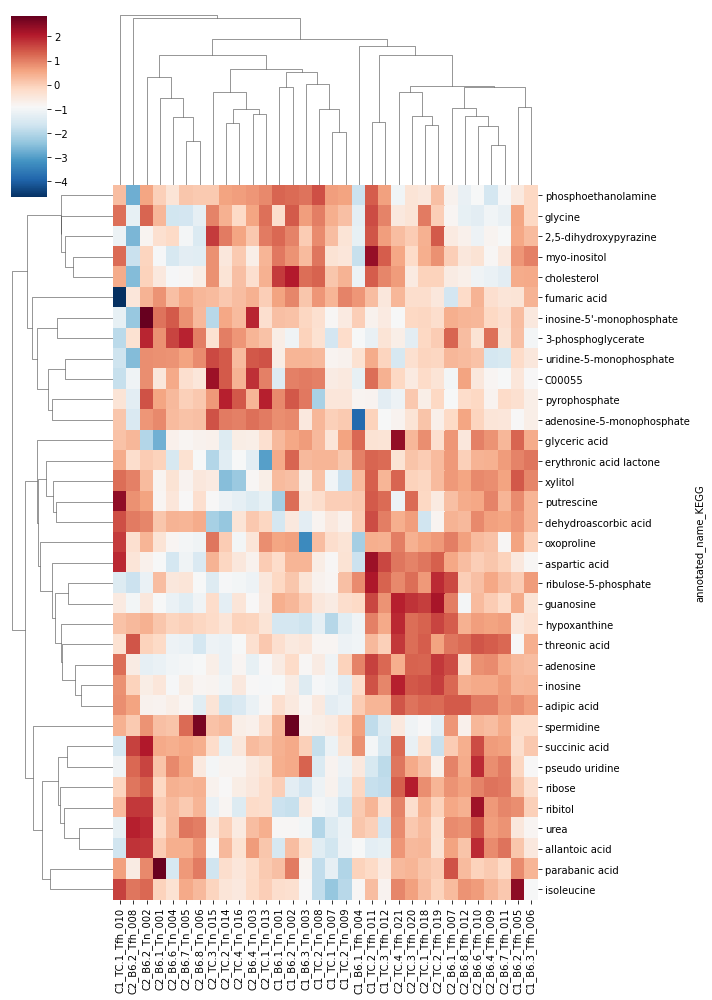

In [69]:
filt_df = mydata.loc[
          (mydata.ftest_pval < p_threshold),:] #

d = filt_df.iloc[:,np.r_[11:43]] #

g = sns.clustermap(d,col_cluster=True, z_score=0, figsize=(10, 14),cmap="RdBu_r") 
plt.show()

g.savefig("one_way_anova_nominalPval_" + str(p_threshold) + ".pdf", bbox_inches='tight') #

# 2-way anova interaction terms.

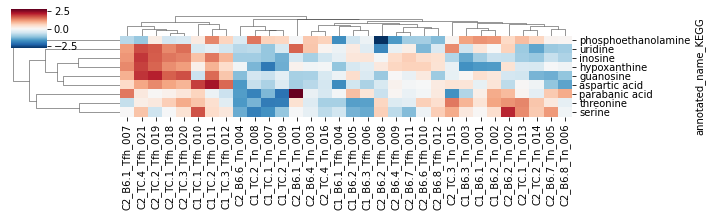

In [70]:
p_threshold = 0.05
mydata = pd.read_csv(infile)

mydata.index = mydata['annotated_name_KEGG']

mydata.columns[11:43]

filt_df = mydata.loc[(mydata.X2wayAnova_pval< p_threshold),:]

d = filt_df.iloc[:,11:43]

g = sns.clustermap(d,col_cluster=True, z_score=0, figsize=(10, 3),cmap="RdBu_r")
plt.show()

g.savefig("interaction_nominalPval_" + str(p_threshold) + ".pdf", bbox_inches='tight')

# only TCvsB6 in Tn

In [71]:
import re

In [72]:
mydata[[x for x in mydata.columns if re.search("B6\.\d_*Tn",x) 
        or re.search("TC\.\d_*Tn",x)]].columns

Index(['C2_B6.1_Tn_001', 'C2_B6.2_Tn_002', 'C2_B6.4_Tn_003', 'C2_B6.6_Tn_004',
       'C2_B6.7_Tn_005', 'C2_B6.8_Tn_006', 'C1_B6.1_Tn_001', 'C1_B6.2_Tn_002',
       'C1_B6.3_Tn_003', 'C1_TC.1_Tn_007', 'C1_TC.2_Tn_008', 'C1_TC.2_Tn_009',
       'C2_TC.1_Tn_013', 'C2_TC.2_Tn_014', 'C2_TC.3_Tn_015', 'C2_TC.4_Tn_016'],
      dtype='object')

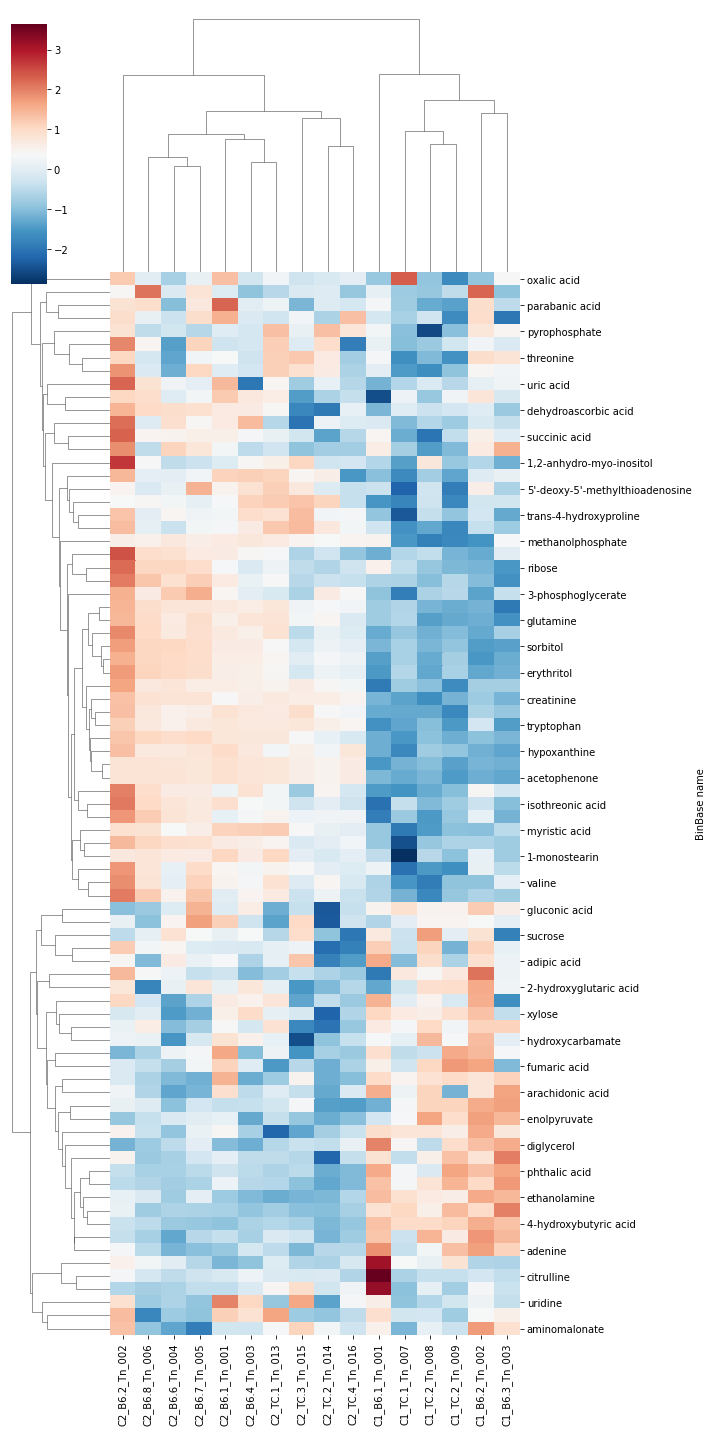

In [73]:
p_threshold = 0.05
mydata = pd.read_csv(infile)

mydata.index = mydata['BinBase name']

filt_df = mydata.loc[
          (mydata.ttest_tscore__TC_TnvsB6_Tn < p_threshold),:]

d = filt_df.loc[:,[x for x in mydata.columns if re.search("B6\.\d_*Tn",x) 
        or re.search("TC\.\d_*Tn",x)]]

g = sns.clustermap(d,col_cluster=True, z_score=0, figsize=(10, 20),cmap="RdBu_r")
plt.show()

g.savefig("Tn_TCvsB6_nominalPval_" + str(p_threshold) + ".pdf", bbox_inches='tight')

# only TCvsB6 in Tfh

In [74]:
mydata[[x for x in mydata.columns if re.search("B6\.\d_*Tfh",x) 
        or re.search("TC\.\d_*Tfh",x)]].columns

Index(['C2_B6.1_Tfh_007', 'C2_B6.2_Tfh_008', 'C2_B6.4_Tfh_009',
       'C2_B6.6_Tfh_010', 'C2_B6.7_Tfh_011', 'C2_B6.8_Tfh_012',
       'C1_B6.1_Tfh_004', 'C1_B6.2_Tfh_005', 'C1_B6.3_Tfh_006',
       'C1_TC.1_Tfh_010', 'C1_TC.2_Tfh_011', 'C1_TC.3_Tfh_012',
       'C2_TC.1_Tfh_018', 'C2_TC.2_Tfh_019', 'C2_TC.3_Tfh_020',
       'C2_TC.4_Tfh_021'],
      dtype='object')

In [75]:
[x for x in mydata.columns if "pval" in x]

['ttest_pval_B6_TfhvsB6_Tn',
 'ttest_pval_TC_TfhvsB6_Tfh',
 'ttest_pval_TC_TfhvsTC_Tn',
 'ttest_pval_TC_TnvsB6_Tn',
 'ftest_pval',
 'X2wayAnova_pval',
 'padj_lim_X2wayAnova_pval']

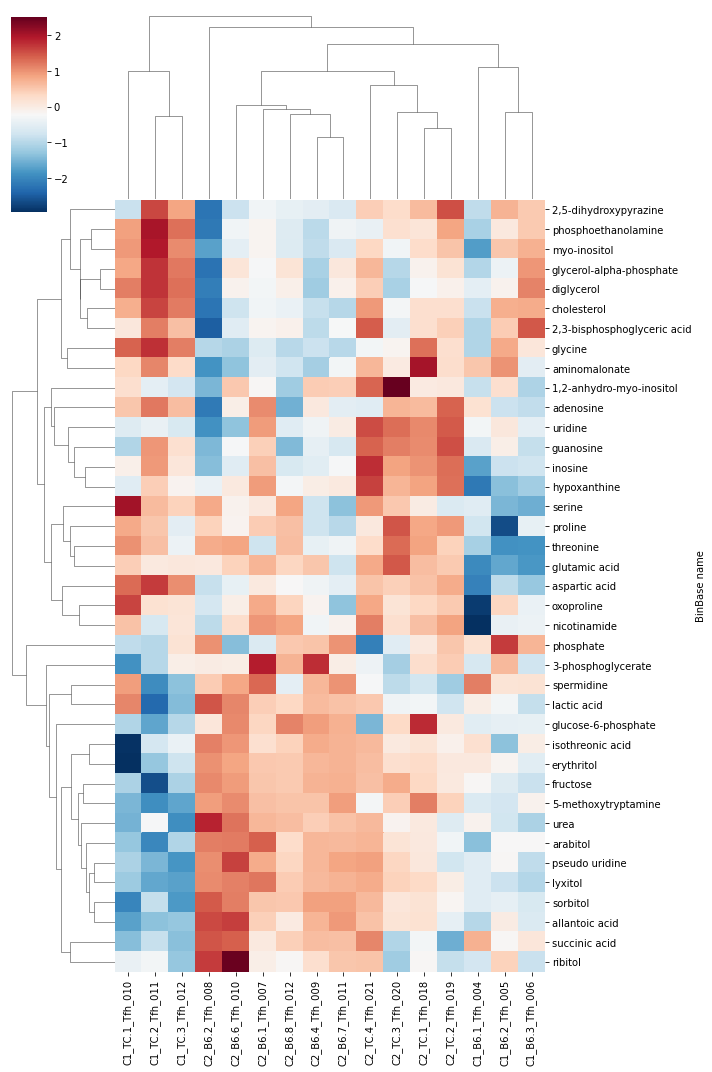

In [76]:
p_threshold = 0.15 #
mydata = pd.read_csv(infile)

mydata.index = mydata['BinBase name']

filt_df = mydata.loc[
          (mydata.ttest_pval_TC_TfhvsB6_Tfh < p_threshold),:] #

d = filt_df.loc[:,[x for x in mydata.columns if re.search("B6\.\d_*Tfh",x) 
        or re.search("TC\.\d_*Tfh",x)]] #

g = sns.clustermap(d,col_cluster=True, z_score=0, figsize=(10, 15),cmap="RdBu_r") 
plt.show()

g.savefig("Tfh_TCvsB6_nominalPval_" + str(p_threshold) + ".pdf", bbox_inches='tight') #

# only TfhvsTn in TC

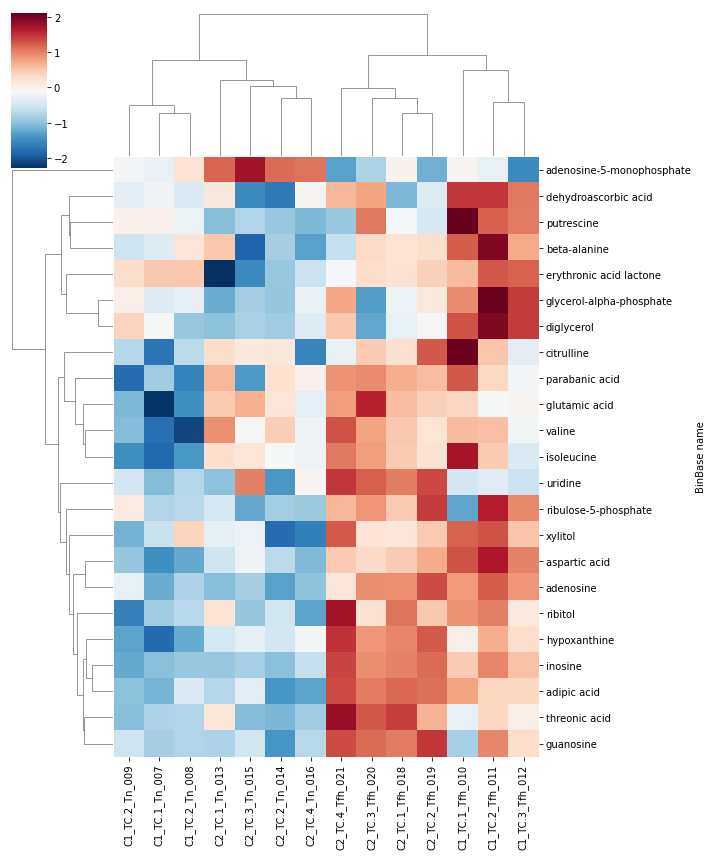

In [77]:
p_threshold = 0.05 #
mydata = pd.read_csv(infile)

mydata.index = mydata['BinBase name']

filt_df = mydata.loc[
          (mydata.ttest_pval_TC_TfhvsTC_Tn < p_threshold),:] #

d = filt_df.loc[:,[x for x in mydata.columns if re.search("TC\.\d_*Tfh",x) 
        or re.search("TC\.\d_*Tn",x)]] #

g = sns.clustermap(d,col_cluster=True, z_score=0, figsize=(10, 12),cmap="RdBu_r") 
plt.show()

g.savefig("TC_TfhvsTn_nominalPval_" + str(p_threshold) + ".pdf", bbox_inches='tight') #

# only TfhvsTn in B6

In [54]:
[x for x in mydata.columns if "pval" in x]

['ttest_pval_B6_TfhvsB6_Tn',
 'ttest_pval_TC_TfhvsB6_Tfh',
 'ttest_pval_TC_TfhvsTC_Tn',
 'ttest_pval_TC_TnvsB6_Tn',
 'ftest_pval',
 'X2wayAnova_pval',
 'padj_lim_X2wayAnova_pval']

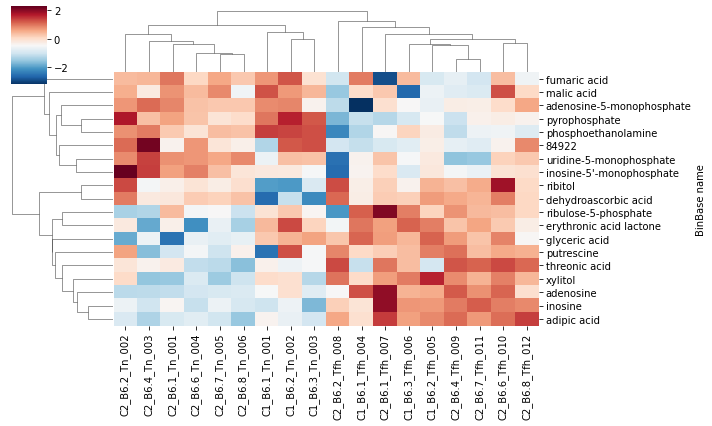

In [55]:
p_threshold = 0.05 #
mydata = pd.read_csv(infile)

mydata.index = mydata['BinBase name']

filt_df = mydata.loc[
          (mydata.ttest_pval_B6_TfhvsB6_Tn < p_threshold),:] #

d = filt_df.loc[:,[x for x in mydata.columns if re.search("B6\.\d_*Tfh",x) 
        or re.search("B6\.\d_*Tn",x)]] #

g = sns.clustermap(d,col_cluster=True, z_score=0, figsize=(10, 6),cmap="RdBu_r")
plt.show()

g.savefig("B6_TfhvsTn_nominalPval_" + str(p_threshold) + ".pdf", bbox_inches='tight') #